# Atividade Prática 08

Isabella Menezes Ramos 3474

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bos

In [4]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


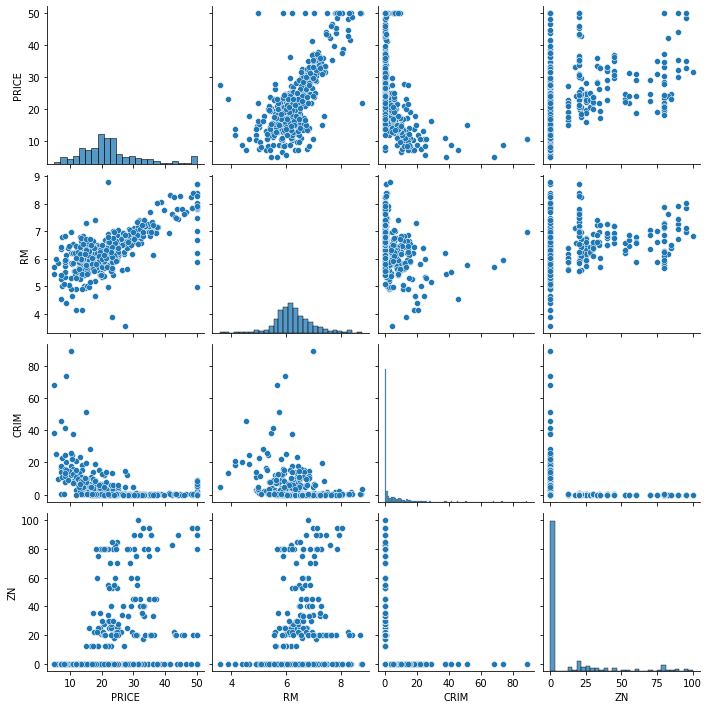

In [6]:
sns.pairplot(df[['PRICE','RM','CRIM','ZN']])

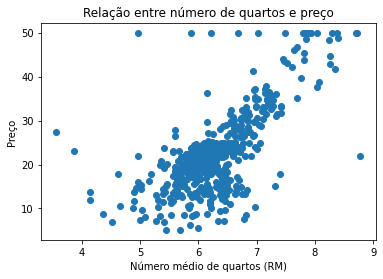

In [7]:
plt.scatter(df.RM, df.PRICE)
plt.xlabel("Número médio de quartos (RM)")
plt.ylabel("Preço")
plt.title("Relação entre número de quartos e preço")
plt.show()

Correlação de Pearson: 0.695
Valor-p: 2.487229e-74


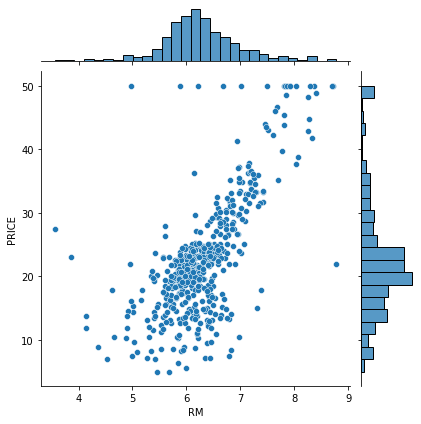

In [8]:
from scipy.stats import pearsonr

sns.jointplot(x='RM', y='PRICE', data=df)
r,p = stats.pearsonr(df['RM'], df['PRICE'])
print("Correlação de Pearson: %.3f" % r)
print("Valor-p: %e" % p)

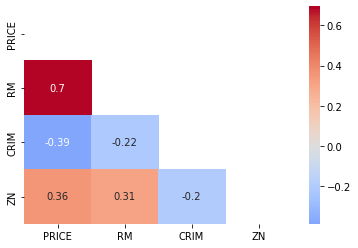

In [9]:
cols=['PRICE','RM','CRIM','ZN']
Var_Corr = df[cols].corr()
matrix = np.triu(df[cols].corr())
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns,annot=True,center=0,cmap='coolwarm', mask=matrix)

In [10]:
from sklearn.linear_model import LinearRegression
X = df.RM
Y = df.PRICE
lm = LinearRegression()
lm.fit(X.values.reshape(-1,1),Y)
print('Coeficiente estimado: ',lm.coef_)
print('R2 (score): ', lm.score(X.values.reshape(-1,1), Y))

Coeficiente estimado:  [9.10210898]
R2 (score):  0.4835254559913343


In [11]:
from sklearn.linear_model import LinearRegression
X = df.drop('PRICE',axis=1)
Y = df.PRICE
lm = LinearRegression()
lm.fit(X,Y)
print('R2 (score): ', lm.score(X.values, Y))

R2 (score):  0.7406426641094095


In [12]:
print("Intercept %.3f" % lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

Intercept 36.459


,Coefficient
CRIM,-0.108011
ZN,0.046420
INDUS,0.020559
CHAS,2.686734
NOX,-17.766611
RM,3.809865
AGE,0.000692
DIS,-1.475567
RAD,0.306049
TAX,-0.012335


In [13]:
lm.predict(X.loc[1].values.reshape(1,-1))

array([25.02556238])

In [14]:
import statsmodels.api as sm 
import pandas.util.testing as tm

X = df.drop('PRICE', axis = 1)
y = df.PRICE
X = sm.add_constant(X)
results = sm.OLS(y,X).fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 25 Sep 2021   Prob (F-statistic):          6.72e-135
Time:                        15:39:19   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [15]:
X = df.drop('PRICE', axis = 1)
X = X.drop('AGE', axis = 1)
X = X.drop('INDUS', axis = 1)
y = df.PRICE
X = sm.add_constant(X)
results = sm.OLS(y,X).fit()
print(results.summary()) # manteve o mesmo R^2

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 25 Sep 2021   Prob (F-statistic):          5.54e-137
Time:                        15:39:19   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.0

# Atividades

1. Utilizar o conjunto de dados weatherHistory.csv, que contém o histórico de variáveis relacionadas ao clima da cidade de Szede, Hungria, entre 2006 e 2016.

In [16]:
# a) Primeiramente, faça uma análise exploratória dos dados, entendendo as variáveis e suas 
# características. Crie gráficos par-a-par das variáveis para tentar identificar possíveis relações
#lineares entre elas;

df = pd.read_csv('weatherHistory.csv')
df


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [17]:
print(df.keys())
print(df.info())
print(df.shape)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud C

<function matplotlib.pyplot.show>

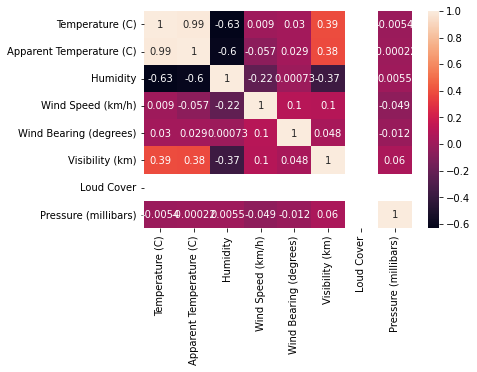

In [18]:
sns.heatmap(df.corr(),annot = True)
plt.show

In [19]:
# b) Qual a equação linear e o coeficiente de determinação que representa a temperatura em termos da
# umidade?

from sklearn.linear_model import LinearRegression
X = df['Temperature (C)']
Y = df['Humidity']
lm = LinearRegression()
lm.fit(X.values.reshape(-1,1),Y)
print('R2 (score): ', lm.score(X.values.reshape(-1,1), Y))
print("Intercept %.3f" % lm.intercept_)
print(lm.coef_)

R2 (score):  0.3997459740945123
Intercept 0.889
[-0.01293911]


Equação: Humidity = 0.889 + Temperature * -0.01293911

In [20]:
# c) Qual a equação linear e o coeficiente de determinação que representa a temperatura em termos da
# umidade e velocidade do vento?

Y = df['Temperature (C)']
X = df[['Humidity','Wind Speed (km/h)']]
lm = LinearRegression()
lm.fit(X,Y)
print('R2 (score): ', lm.score(X.values, Y))
print("Intercept %.3f" % lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

R2 (score):  0.4184534276004692
Intercept 37.867


,Coefficient
Humidity,-32.437362
Wind Speed (km/h),-0.193934


Equação: Temperature = 37.867 + Humidity * -32.437362 + Wind Speed * -0.193934

In [21]:
#d) Qual a equação linear e o coeficiente de determinação que representa a temperatura aparente em
# termos da temperatura, da velocidade do vento e da umidade?

Y = df['Apparent Temperature (C)']
X = df[['Temperature (C)','Humidity','Wind Speed (km/h)',]]
lm = LinearRegression()
lm.fit(X,Y)
print('R2 (score): ', lm.score(X.values, Y))
print("Intercept %.3f" % lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

R2 (score):  0.989812786297048
Intercept -2.330


,Coefficient
Temperature (C),1.125924
Humidity,1.055446
Wind Speed (km/h),-0.094870


Equação: Apparent Temperature = -2.330 + Temperature * 1.125924 + Humidity * 1.055446 + Wind Speed * -0.094870

In [26]:
atributos_corr = ['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Loud Cover','Pressure (millibars)']
atributos_corr

['Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)']

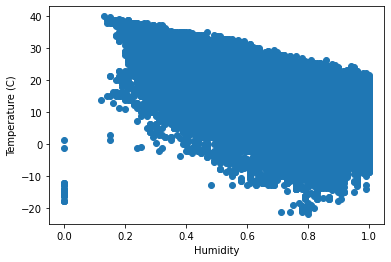

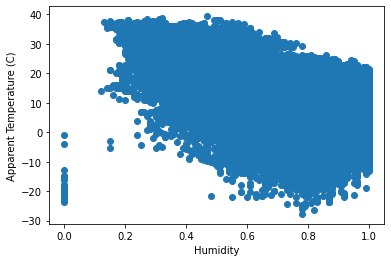

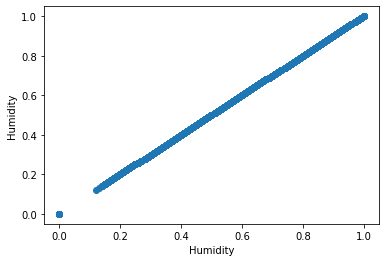

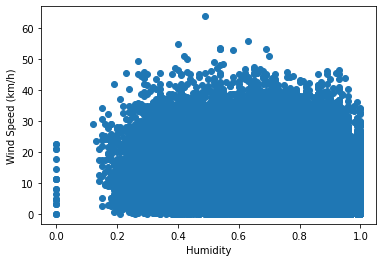

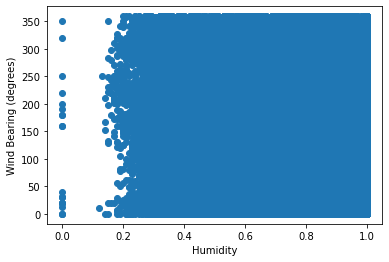

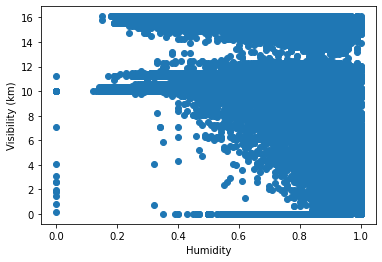

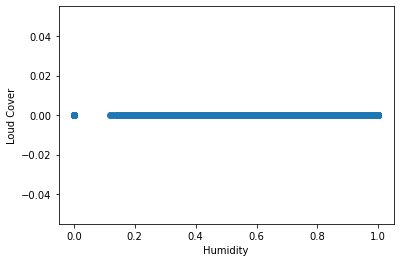

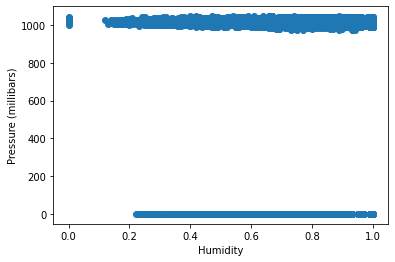

In [28]:
# e) Quais variáveis do dataset você indica para serem utilizadas para prever a umidade? Explique sua
# resposta.
for data in atributos_corr:
    plt.xlabel("Humidity")
    plt.ylabel(data)
    plt.scatter(df['Humidity'], df[data])
    plt.show()

In [29]:
corr = df.corr('spearman')
corr = corr[['Humidity']].sort_values(by = ['Humidity'],ascending = False)
corr

,Humidity
Humidity,1.000000
Pressure (millibars),0.042993
Wind Bearing (degrees),-0.001967
Wind Speed (km/h),-0.261980
Visibility (km),-0.432075
Apparent Temperature (C),-0.572551
Temperature (C),-0.588106
Loud Cover,NaN


As variáveis indicadas são Apparent Temperature (C)	e Temperature (C).
